In [11]:
!kaggle competitions download -c tabular-playground-series-apr-2022


  0%|          | 0.00/171M [00:00<?, ?B/s]
  1%|          | 1.00M/171M [00:00<00:24, 7.30MB/s]
  1%|1         | 2.00M/171M [00:00<00:24, 7.18MB/s]
  2%|1         | 3.00M/171M [00:00<00:23, 7.60MB/s]
  3%|2         | 5.00M/171M [00:00<00:18, 9.51MB/s]
  4%|4         | 7.00M/171M [00:00<00:16, 10.3MB/s]
  5%|5         | 9.00M/171M [00:01<00:33, 5.05MB/s]
  6%|6         | 11.0M/171M [00:01<00:26, 6.32MB/s]
  8%|7         | 13.0M/171M [00:01<00:22, 7.49MB/s]
  9%|8         | 15.0M/171M [00:02<00:19, 8.49MB/s]
 10%|9         | 17.0M/171M [00:02<00:17, 9.32MB/s]
 11%|#1        | 19.0M/171M [00:02<00:16, 9.94MB/s]
 12%|#2        | 21.0M/171M [00:02<00:15, 10.5MB/s]
 13%|#3        | 23.0M/171M [00:02<00:14, 10.8MB/s]
 15%|#4        | 25.0M/171M [00:02<00:13, 11.0MB/s]
 16%|#5        | 27.0M/171M [00:03<00:13, 11.0MB/s]
 17%|#6        | 29.0M/171M [00:03<00:13, 11.2MB/s]
 18%|#8        | 31.0M/171M [00:03<00:12, 11.3MB/s]
 19%|#9        | 33.0M/171M [00:03<00:12, 11.5MB/s]
 20%|##        | 35.

reference : TPSAPR22 EDA which makes sense -AMBROSM 
https://www.kaggle.com/code/ambrosm/tpsapr22-eda-which-makes-sense



In [22]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from cycler import cycler
from IPython.display import display
import datetime

from sklearn.decomposition import PCA

plt.rcParams['axes.facecolor'] = '#0057b8'
plt.rcParams['axes.prop_cycle'] = cycler(color= ['#ffd700'] +
                                        plt.rcParams['axes.prop_cycle'].by_key()['color'][1:])

In [2]:
os.listdir("./")

['.ipynb_checkpoints',
 '2204_tabular-playground-series.ipynb',
 'tabular-playground-series-apr-2022']

In [5]:
train = pd.read_csv('./tabular-playground-series-apr-2022/train.csv')
train_labels = pd.read_csv("./tabular-playground-series-apr-2022/train_labels.csv")
test = pd.read_csv("./tabular-playground-series-apr-2022/test.csv")

In [4]:
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [7]:
train_labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [8]:
test.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.0,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.0,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483


In [9]:
train.shape, train_labels.shape, test.shape

((1558080, 16), (25968, 2), (733080, 16))

In [19]:
train.subject.value_counts()/60

437    199.0
1      175.0
635    158.0
647    144.0
87     129.0
       ...  
486      7.0
519      7.0
265      6.0
73       5.0
472      2.0
Name: subject, Length: 672, dtype: float64

There are almost 26000 sequences in the trainig data(25968, to be precise). The train dataframe has exactly 60 times more rows than the train_labels dataframe(25968* 60 = 1558080) because every sequence has 60 steps. There are no missing steps, and the steps are numbered from 0 to 59. 

We have to predict a binary state for every series (binary classification). Every sequence has 60 * 13 = 780 features.

The train and test subjects are disjoint.

**Insight**:
* As the train and test subjects are different, we cannot use the subject as a feature. On the contrary, we have to make sure that our classifier generalizes to previously unseen subjects. This suggests a GroupKFold cross-validation with the subjects as groups.

* With the 780 features per sequence, feature engineering could play an important role here. Or we might use a deep neural network which operates on the raw data and learns the features itself.

In the following notebook cell, we check how often each subject occurs in the training data. The most infrequent subject occurs only twice; the most frequent subject is a hundred times more frequent; it occurs 199 times. The picture for the test data is similar. 

**Insight**:
* If we cross-validate with a simple GroupKFold, the training and validation sets for the different folds will have different sizes. Maybe we can neglect this, maybe we want to take additional measures to have training sets of similar sizes. 


472      2
73       5
265      6
519      7
486      7
      ... 
87     129
647    144
635    158
1      175
437    199
Name: sequence count per training subject, Length: 672, dtype: int64
823      8
943     10
973     11
975     11
830     11
      ... 
874     98
865     99
781    103
682    107
748    148
Name: sequence count per test subject, Length: 319, dtype: int64


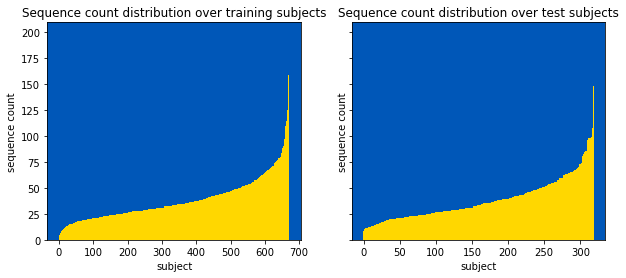

In [26]:
plt.subplots(1,2,sharey= True, figsize=(10,4))
def plot_sequence_count_distribution(df,title):
    temp =df.subject.value_counts().sort_values()//60
    plt.bar(range(len(temp)), temp, width=1)
    plt.xlabel("subject")
    plt.ylabel("sequence count")
    plt.title(f"Sequence count distribution over {title} subjects")
    print(temp.sort_values().rename(f'sequence count per {title} subject'))
    
plt.subplot(1,2,1)
plot_sequence_count_distribution(train,'training')
plt.subplot(1,2,2)
plot_sequence_count_distribution(test,'test')
plt.show()

While we are looking at the subjects, we can calculate the means of the states per subject and plot them as a histogram (the mean of the state corresponds to the probability that state = 1). We only use subjects with at least 25 sequences for the histogram. If every sequence is in state=1 with 50% probability, the histogram should show a bell curve with a standard deviation of at most 0.1, but the histogram shows that the standard deviation is higher. The subjects are inherently different. Every subject has its own probability of state =1, and this probability can have any value between 0 and 1. 50 subjects are always in state 0. 

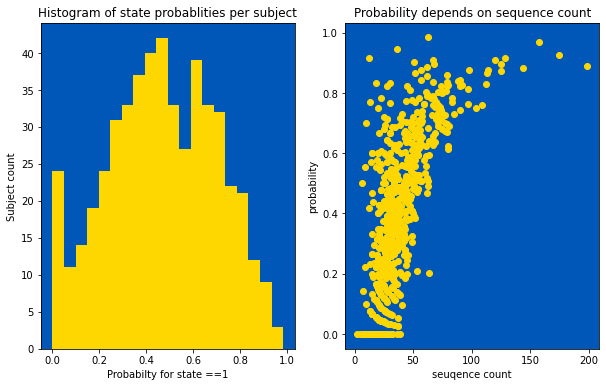


The standard deviation of 0.23 is much higher than 0.1

Subjects which are always in state 0: 59


In [39]:
temp = train.groupby("sequence").subject.min() 
temp = train_labels.merge(temp, on='sequence')
temp = temp.groupby('subject').agg({"state":"mean","sequence":"count"}).rename(
    columns={"state":"probability","sequence":"sequence_count"})
temp1 = temp[temp.sequence_count >= 25].probability.rename("Probability of state==1")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(temp1, bins=20)
plt.ylabel("Subject count")
plt.xlabel("Probabilty for state ==1")
plt.title("Histogram of state probablities per subject")

plt.subplot(1,2,2)
plt.scatter(temp.sequence_count, temp.probability)
plt.xlabel("seuqence count")
plt.ylabel("probability")
plt.title("Probability depends on sequence count")
plt.show()

print()
print(f"The standard deviation of {temp[temp.sequence_count>= 25].probability.std():.2f} is much higher than 0.1")
print()
print("Subjects which are always in state 0:", (temp.probability == 0).sum())